In [1]:
import numpy as np
import matplotlib.pyplot as plt

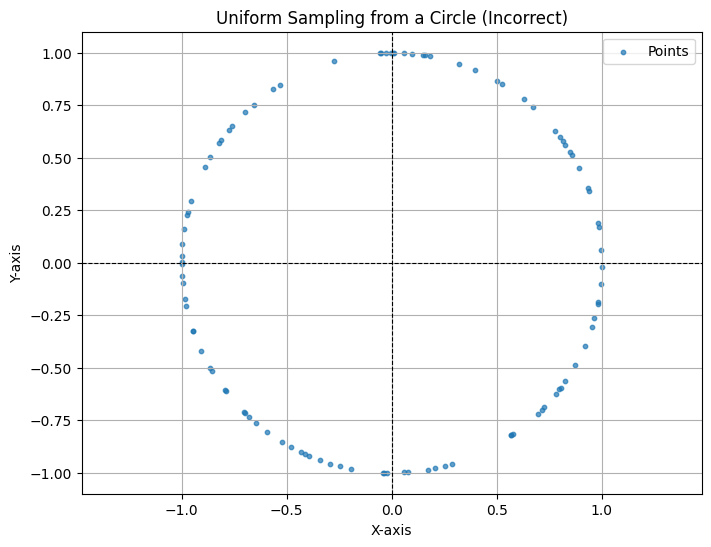

In [83]:
# Sampling points uniformly from a 2D circle

number_of_points_1 = 100

angles = np.random.uniform(0, 2 * np.pi, size=number_of_points_1)
circle = np.array([np.cos(angles), np.sin(angles)])

# Extract x and y coordinates
x = circle[0]
y = circle[1]

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=10, alpha=0.7, label="Points")  # Scatter plot

# Add x and y axes
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Horizontal axis
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)  # Vertical axis

# Add labels, title, and grid
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Uniform Sampling from a Circle (Incorrect)')
plt.grid(True)
plt.axis('equal')  # Ensures the circle looks circular
plt.legend()
plt.show()

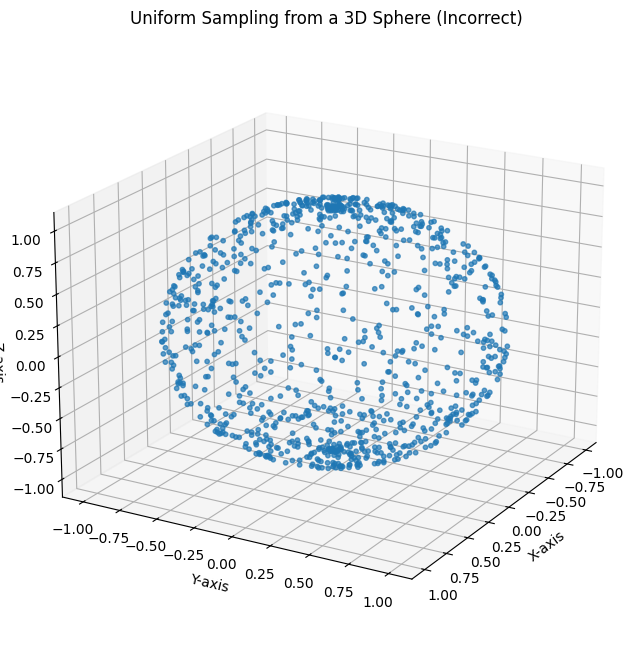

In [87]:
# Sampling Uniformally from the 3D Sphere

number_of_points_2 = 1000

angles = np.random.uniform(0, 2 * np.pi, (2, number_of_points_2))

theta = angles[0]
psi = angles[1]

x = np.sin(theta) * np.cos(psi)
y = np.sin(theta) * np.sin(psi)
z = np.cos(theta)

# 3D Plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the points
ax.scatter(x, y, z, s=10, alpha=0.7)

# Adding axes labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Uniform Sampling from a 3D Sphere (Incorrect)')

# Adjust the view for better visualization
ax.view_init(elev=20, azim=30)
plt.show()

## Explanation of the Above Strategy and Why It Is Incorrect

**Citation:** [Cory Simon - Uniform Distribution on a Sphere](https://corysimon.github.io/articles/uniformdistn-on-sphere/)

If you look at the plot above, the majority of points are concentrated near the edges of the sphere, while the middle of the sphere appears almost empty.

The reason for this lies in the differential volume in polar coordinates, which is given by:

$$
r^2 \sin(\theta) \, dr \, d\theta \, d\psi
$$

In our case, since \( r = 1 \) (we are on the surface of the sphere), the differential area becomes:

$$
\sin(\theta) \, d\theta \, d\psi
$$

What we notice here is that $\sin(\theta)$ becomes small when $\theta$ is small (i.e., near the poles). As a result, fewer points should be mapped to areas where \( $\theta$ \) is small. However, in the above strategy, we sampled \( $\theta$ \) uniformly, which fails to account for this discrepancy. This leads to an over-concentration of points near the poles and an under-representation of points near the equator.

### Intuition
Given a $2\pi \times 2\pi$ square, the differential area at each point is the same because there is no curvature. However, when we "curve" the square to wrap it around a sphere, the differential area decreases near the poles due to curvature. Consequently, the sampling is no longer uniform because equal-sized patches in the rectangular parameterization correspond to unequal areas on the sphere.

### Possible approach to sample on the hyper sphere $S^{n-1}$

1. Generate $X_{i} \sim \mathcal{N}(0,1), i \in \{1,..,N\}$
2. Compute $\lambda^{2} = X_{1}^{2} + ... + X_{n}^{2}$
3. Get a vector on a sphere $V_{s} := (X_{1}/\lambda,...,X_{n}/\lambda)$

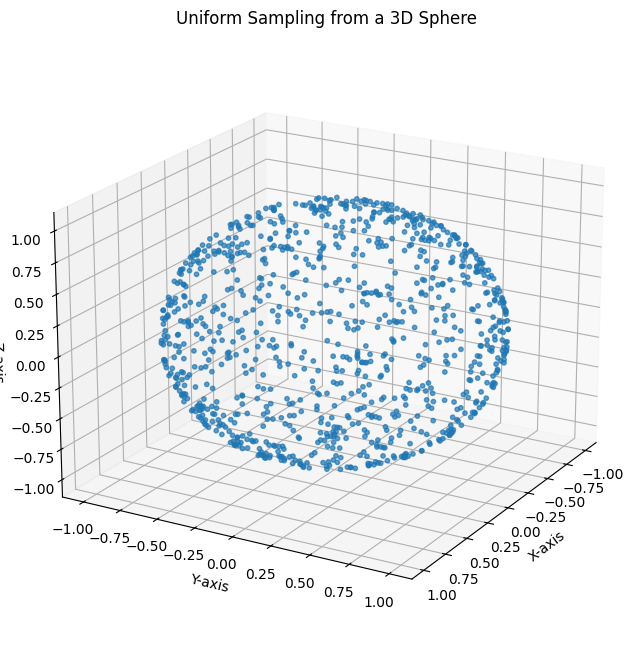

In [85]:
# Fixed uniform sampling in 3D

number_of_points_3 = 1000

points = np.random.normal(0, 1, (3, number_of_points_3)) # (3, number_of_points)

norms_squared = (points ** 2).sum(axis=0) # (number_of_points)

points_on_sphere = points / np.sqrt(norms_squared) # (3, number_of_points)

x = points_on_sphere[0]
y = points_on_sphere[1]
z = points_on_sphere[2]

# 3D Plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the points
ax.scatter(x, y, z, s=10, alpha=0.7)

# Adding axes labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Uniform Sampling from a 3D Sphere')

# Adjust the view for better visualization
ax.view_init(elev=20, azim=30)
plt.show()